# Importacion y analisis inicial

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_dir = Path().resolve().parent
# Ruta al archivo
dataset_path = base_dir / 'data' / 'raw' / 'PS_20174392719_1491204439457_log.csv'
output_path = base_dir / 'data' / 'processed' / 'data_cleaned.parquet'


# Cargar dataset
df = pd.read_csv(dataset_path)

# Mostrar dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (6362620, 11)


In [6]:
# Primeras filas
print("\nPrimeras filas:")
df.head()


Primeras filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Información general
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [34]:
[print(column) for column in df.columns]

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


[None, None, None, None, None, None, None, None, None, None, None]

In [29]:
# Estadísticas generales
print("\nEstadísticas descriptivas:")
df.describe( include='all')


Estadísticas descriptivas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [30]:
# Validacion longitud de caracteres
print(len(max(df.nameOrig, key=len)))
print(len(max(df.nameDest, key=len)))
print(len(max(df.type, key=len)))

11
11
8


In [10]:
# Validación de vacíos
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
(df == "").sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df.isna().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Limpieza

In [9]:
# Eliminar duplicados
df_clean = df.drop_duplicates()
print(f"Registros originales: {len(df)} | Registros limpios: {len(df_clean)}")

Registros originales: 6362620 | Registros limpios: 6362620


In [10]:
# Verificar nulos por columna
print(df_clean.isnull().sum())

# Si hay nulos en 'amount' (raro en este dataset):
df_clean["amount"] = df_clean["amount"].fillna(df_clean["amount"].median())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
df = df_clean.copy()

# Visualizacion

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


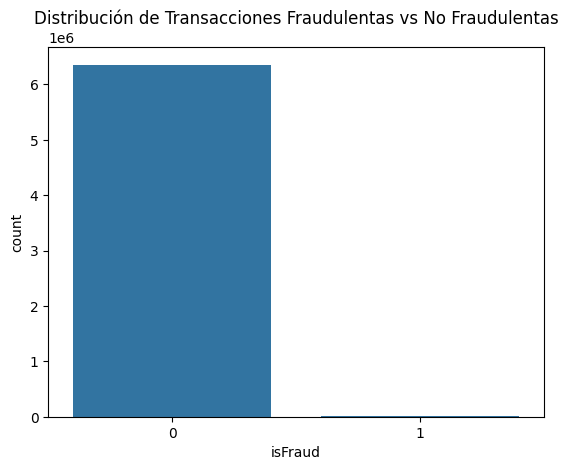

In [18]:
# Distribución de clases
sns.countplot(data=df, x='isFraud')
plt.title("Distribución de Transacciones Fraudulentas vs No Fraudulentas")
print(df['isFraud'].value_counts(normalize=True))
plt.show()

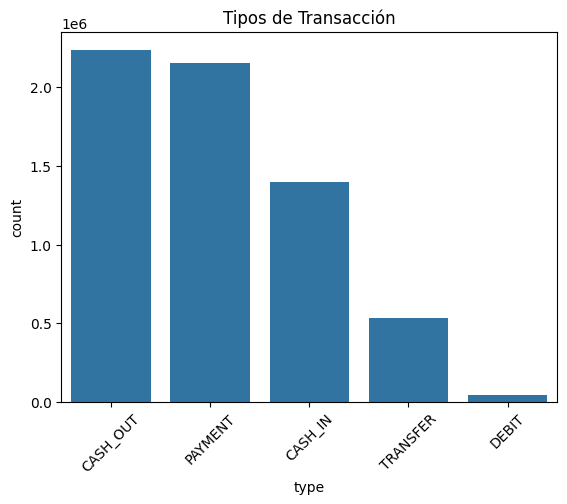

In [13]:
# Tipos de transacción
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Tipos de Transacción")
plt.xticks(rotation=45)
plt.show()

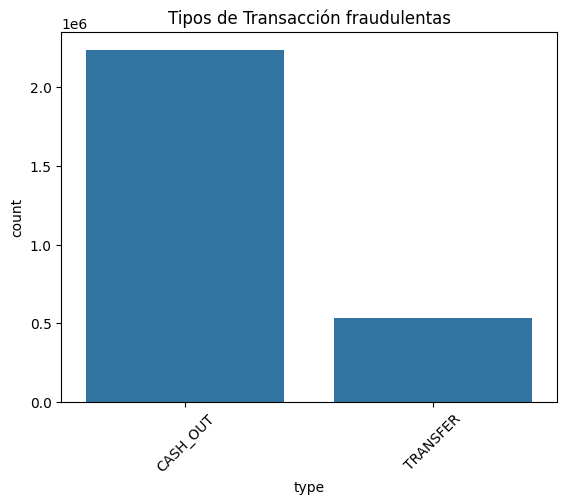

In [14]:
# Tipos de transacción fraudulenta
sns.countplot(data=df, x='type', order=df[df['isFraud']==1]['type'].value_counts().index)
plt.title("Tipos de Transacción fraudulentas")
plt.xticks(rotation=45)
plt.show()

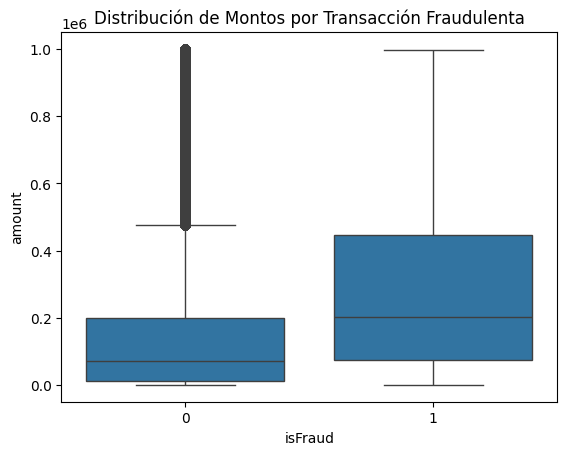

In [15]:
# Comparar montos fraudulentos vs no fraudulentos
sns.boxplot(data=df[df['amount'] < 1000000], x='isFraud', y='amount')
plt.title("Distribución de Montos por Transacción Fraudulenta")
plt.show()

# Procesado de datos

In [16]:
# Creacion de columna normalizada de la cantidad de la transacción
df_clean["amount_log"] = np.log(df_clean["amount"] + 1)

In [17]:
# Crear una columna de fecha basada en la columna 'step'
# Asumimos que cada 'step' representa una hora desde el 1 de enero a las 00:00
start_date = pd.Timestamp("2025-01-01 00:00:00")  # Fecha inicial
df_clean["fecha"] = start_date + pd.to_timedelta(df_clean["step"], unit="h")

df_clean[["step", "fecha"]].tail()

,step,fecha
6362615,743,2025-01-31 23:00:00
6362616,743,2025-01-31 23:00:00
6362617,743,2025-01-31 23:00:00
6362618,743,2025-01-31 23:00:00
6362619,743,2025-01-31 23:00:00


In [18]:
# Convertir columnas de tipo object a tipo category
object_columns = df_clean.select_dtypes(include=["object"]).columns
df_clean[object_columns] = df_clean[object_columns].astype("category")

# Verificar los tipos de datos después de la conversión
print(df_clean.dtypes)

step                       int64
type                    category
amount                   float64
nameOrig                category
oldbalanceOrg            float64
newbalanceOrig           float64
nameDest                category
oldbalanceDest           float64
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
amount_log               float64
fecha             datetime64[ns]
dtype: object


# Lectura

In [34]:
# Leer el archivo Parquet
df_loaded = pd.read_parquet(output_path)
df_loaded

,type,amount,name_orig,orig_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud,datetime
0,PAYMENT,9.753550e+03,C1048712791,6.082900e+04,51075.449219,M487792155,0.000,0.00,False,False,2025-01-01
1,CASH_OUT,3.387671e+05,C691691381,0.000000e+00,0.000000,C453211571,544481.250,3461666.00,False,False,2025-01-01
2,TRANSFER,2.764606e+05,C1871680329,5.950000e+02,0.000000,C1360767589,1105242.250,2107965.50,False,False,2025-01-01
3,PAYMENT,7.649410e+03,C1129869771,4.443575e+04,36786.339844,M1620459733,0.000,0.00,False,False,2025-01-01
4,PAYMENT,1.489551e+04,C1527882132,0.000000e+00,0.000000,M935160003,0.000,0.00,False,False,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,8.276365e+04,C1228321734,5.033200e+04,0.000000,C976143620,795837.625,878601.25,False,False,2025-01-30
6362616,PAYMENT,8.197960e+03,C1832889744,4.500000e+03,0.000000,M1802088833,0.000,0.00,False,False,2025-01-30
6362617,PAYMENT,4.373440e+03,C1772016180,3.960000e+04,35226.558594,M113866504,0.000,0.00,False,False,2025-01-30
6362618,TRANSFER,2.747996e+05,C1459244245,2.747996e+05,0.000000,C957617194,0.000,0.00,True,False,2025-01-31


In [41]:
# leer account.parquet
account_path = base_dir / 'data' / 'modeled' / 'account.parquet'
df_account = pd.read_parquet(account_path)
df_account.dtypes

account_code    object
account_id       int64
dtype: object

In [40]:
# leer transaction_type.parquet
account_path = base_dir / 'data' / 'modeled' / 'transaction_type.parquet'
df_account = pd.read_parquet(account_path)
df_account.dtypes

type_id              int32
transaction_type    object
dtype: object

In [39]:
# leer transaction.parquet
account_path = base_dir / 'data' / 'modeled' / 'transaction.parquet'
df_account = pd.read_parquet(account_path)
df_account.dtypes

transaction_id       int64
type_id              int32
orig_account_id      int64
dest_account_id      int64
old_balance_orig    object
new_balance_orig    object
old_balance_dest    object
new_balance_dest    object
amount              object
is_fraud              bool
is_flagged_fraud      bool
datetime            object
dtype: object